In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os

/Users/johnbrandt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder/2")

INFO:tensorflow:Using /var/folders/m5/_p_tp0v535z7k52m4qjcff6h0000gn/T/tfhub_modules to cache modules.
INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/2'.
INFO:tensorflow:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/2'.


In [23]:
word = "Restoration can help cities become more sustainable"
sentence = "Sustainability in cities is increased with restoration."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(messages))

  for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding)))
    message_embedding_snippet = ", ".join(
        (str(x) for x in message_embedding[:3]))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Restoration can help cities become more sustainable
Embedding size: 512
Embedding: [0.008160695433616638, 0.02845083177089691, -0.01621032878756523, ...]

Message: Sustainability in cities is increased with restoration.
Embedding size: 512
Embedding: [0.006870410870760679, 0.05667994171380997, -0.01690514013171196, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [0.01879097707569599, 0.045365191996097565, -0.02001088112592697, ...]



In [44]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0.5,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")


def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
  message_embeddings_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: messages_})
  plot_similarity(messages_, message_embeddings_, 90)

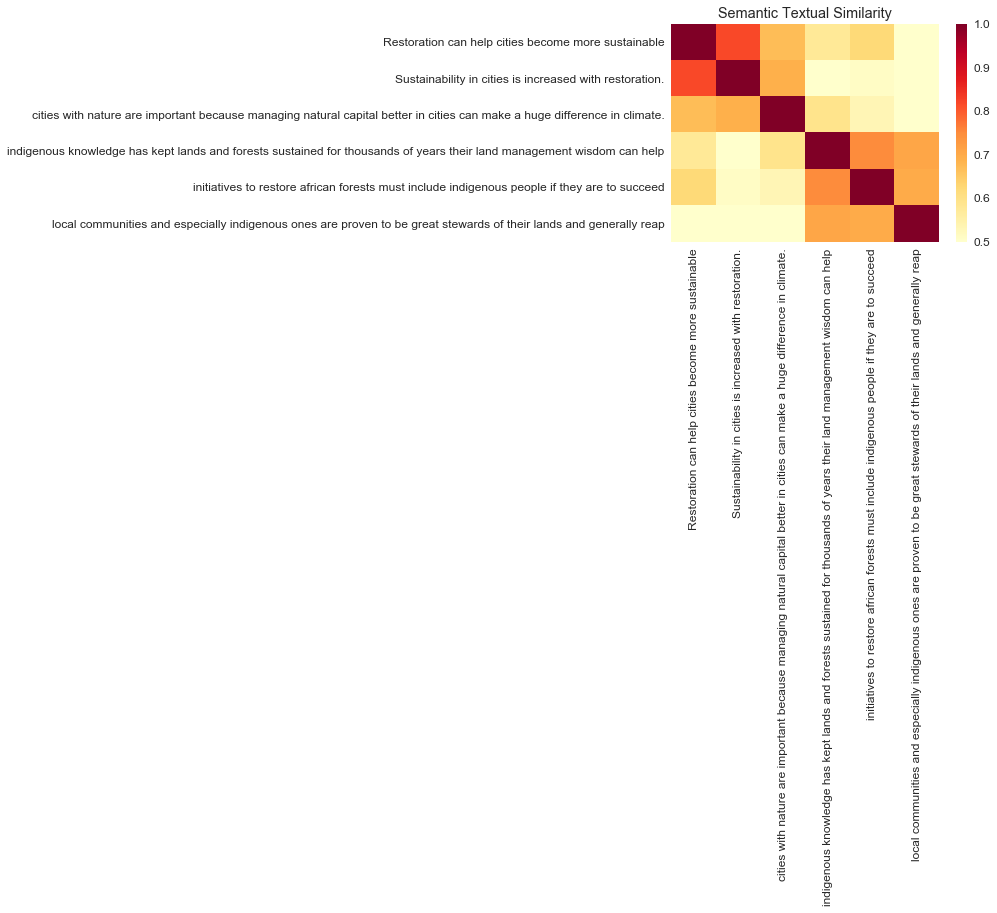

In [45]:
messages = [
    # Smartphones
    "Restoration can help cities become more sustainable",
    "Sustainability in cities is increased with restoration.",
    "cities with nature are important because managing natural capital better in cities can make a huge difference in climate.",

    # Weather
    "indigenous knowledge has kept lands and forests sustained for thousands of years their land management wisdom can help",
    "initiatives to restore african forests must include indigenous people if they are to succeed",
    "local communities and especially indigenous ones are proven to be great stewards of their lands and generally reap",
]


similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)